In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Reading the data
data= pd.read_csv(r"C:\Users\One\Desktop\Excelr\Assignments\7/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
data=data.iloc[:,1:] #Droping Unwanted column

In [12]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [14]:
#Checking for duplicated value
data.duplicated().sum()

0

In [15]:
#Checking for null values
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [16]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [19]:
data.describe() #Statitical information about the data

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Hiearchical Clustering

In [20]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
data1=data.apply(norm_func)

In [22]:
data1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [23]:
data1.shape

(50, 4)

In [24]:
hcluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [25]:
y=pd.DataFrame(hcluster.fit_predict(data1),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
1    18
2    12
Name: clustersid, dtype: int64

In [27]:
y.head()

,clustersid
0,0
1,0
2,0
3,1
4,0


In [28]:
hdata=data.copy()

In [29]:
hdata.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [30]:
hdata=pd.concat([hdata,y],axis=1)

In [31]:
hdata.head()

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


## KMeans Clustering

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()

In [34]:
kmdata=sc.fit_transform(data)

In [36]:
kmdata

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

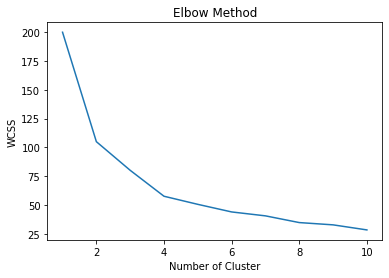

In [37]:
#Elbow method for optimum cluster
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(kmdata)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [39]:
kmeans=KMeans(4,random_state=42)

In [41]:
y=pd.DataFrame(kmeans.fit_predict(kmdata),columns=['clustersid'])
y['clustersid'].value_counts()

0    16
2    13
3    13
1     8
Name: clustersid, dtype: int64

In [42]:
Kdf=data.copy()

In [44]:
Kdf=pd.concat([Kdf,y],axis=1)

In [46]:
Kdf.head()

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


## DBSCAN Clustering

In [48]:
dbdata=sc.fit_transform(data)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [50]:
dbdata

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [63]:
dbscan=DBSCAN(eps=2,min_samples=6)

In [64]:
y=pd.DataFrame(dbscan.fit_predict(dbdata),columns=['clustersid'])
y['clustersid'].value_counts()

 0    49
-1     1
Name: clustersid, dtype: int64

In [65]:
DBS=data.copy()

In [66]:
DBS.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [67]:
DBS=pd.concat([DBS,y],axis=1)

In [68]:
DBS.head()

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
